# NLP Project - Accidents Classification

In [ ]:
import numpy as np
import pandas as pd

## Importing Data

In [ ]:
data = pd.read_excel('/kaggle/input/accident-descritpions/Data Set - Industrial Safety and Health Database with Accidents Description.xlsx')

In [ ]:
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.shape

(425, 11)

## EDA

In [ ]:
# Missing Values

data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
# Duplicates

data.duplicated().sum()

0

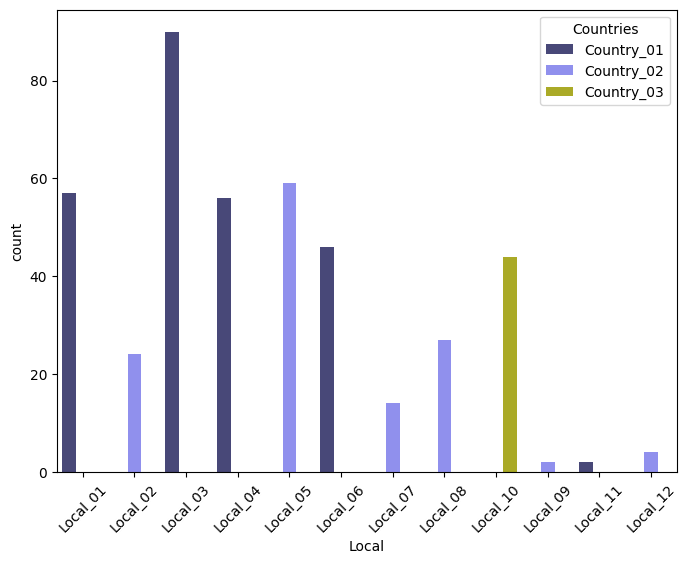

In [ ]:
# Count plots for Localities, Countries invovled

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
sns.countplot(data = data, x = 'Local', hue = 'Countries', palette='gist_stern')
plt.xticks(rotation=45)
plt.show()

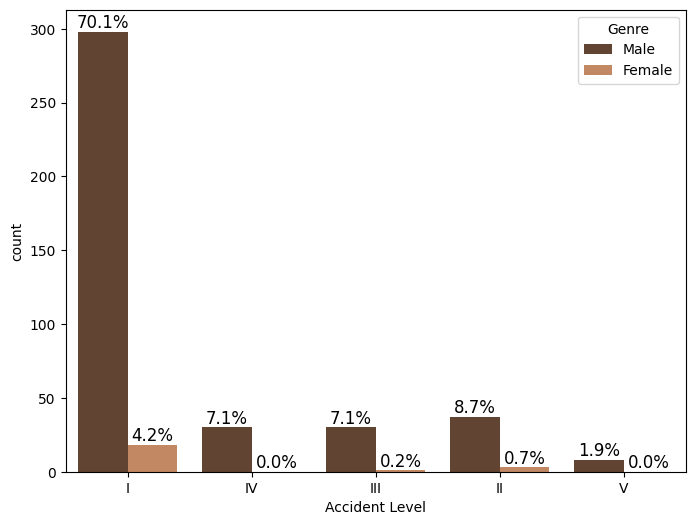

In [ ]:
# Understanding 'Accident Level' and 'Gender' relation

plt.figure(figsize=(8, 6))
# sns.countplot(data = data, x = 'Accident Level' , hue = 'Genre')


ax = sns.countplot(data=data, x='Accident Level', hue='Genre', palette = 'copper')

# Calculating total count

total_count = len(data)

# Annotating each bar with percentage values

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # Center annotation on the bar
    percentage = f'{100 * height / total_count:.1f}%'  # Calculating percentage
    ax.annotate(percentage, (x, height), ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [ ]:
# Understanding Top-3 'Critical Risks' for each 'Potential Accident Level'


# Creating a PD DataFrame to capture the top-3 'Critical Risks' for each 'Accident Level'

cr_df_vals = data.groupby('Accident Level')['Critical Risk'].value_counts() \
                 .groupby('Accident Level').head(3)
cr_df = cr_df_vals.reset_index()

In [ ]:
cr_df

,Accident Level,Critical Risk,count
0,I,Others,172
1,I,Pressed,17
2,I,Venomous Animals,16
3,II,Others,21
4,II,Manual Tools,5
5,II,Chemical substances,2
6,III,Others,23
7,III,Manual Tools,3
8,III,Pressed,2
9,IV,Others,13


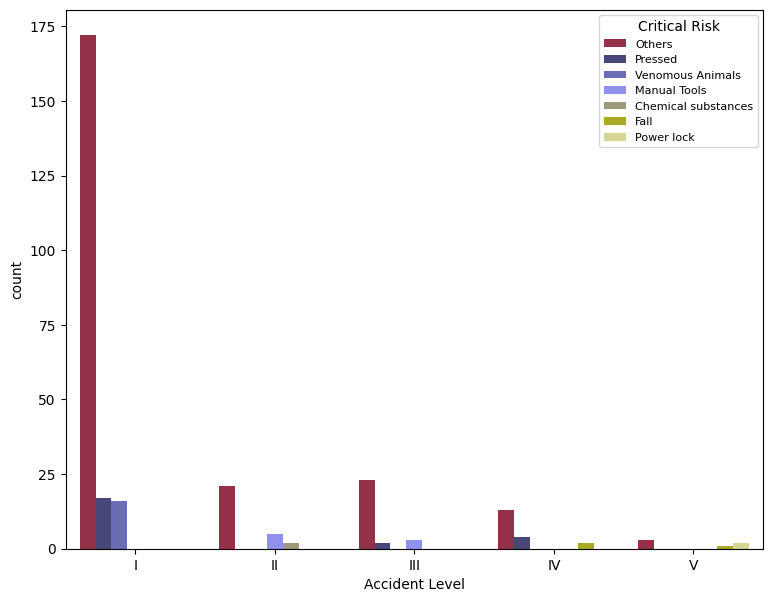

In [ ]:
# Creating a Barplot for this

plt.figure(figsize=(9, 7))
sns.barplot(data=cr_df, x= 'Accident Level', y = 'count', hue = 'Critical Risk', palette='gist_stern')
plt.legend(title="Critical Risk", loc="upper right", fontsize=8)
plt.show()

In [ ]:
# Understanding the number of accidents occured for each Month, Year

# 1. Extracting Month-Year from the given data

data['Data'] = pd.to_datetime(data['Data'])

data['Year-Month'] = data['Data'].dt.strftime('%b-%Y')


# 2. Counting number of accidents per month-year
cnt_m_y = data['Year-Month'].value_counts().sort_index()

In [ ]:
# Extracting Month-Year from the given data

data['Data'] = pd.to_datetime(data['Data'])
data['Year-Month'] = data['Data'].dt.to_period('M')

In [ ]:
# Counting number of accidents per month-year and  converting Period index to string format for plotting

cnt_m_y = data['Year-Month'].value_counts().sort_index()

cnt_m_y.index = cnt_m_y.index.astype(str)

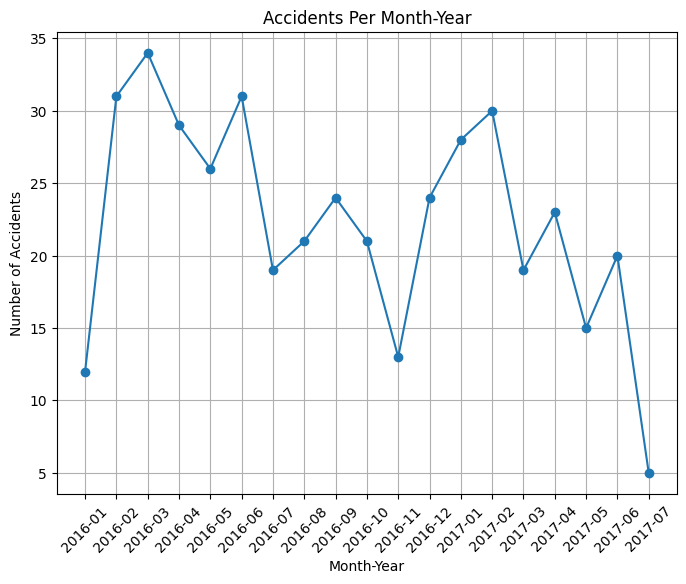

In [ ]:
#3. Ploting line chart

plt.figure(figsize=(8, 6))
plt.plot(cnt_m_y.index, cnt_m_y.values, marker='o', linestyle='-')
plt.xlabel("Month-Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents Per Month-Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### EDA Observations

1. The accident details are from 11 Localities spanning 3 countries
2. Majority of accidents involve "Males", contributing to ~ 97% of the acccidents
3. For all the accidents, the major critical risk falls under "Others" category
4. Accidents data spans from Jan-2016 to Jul-2017, a total of 19 months. And there's a steep drop in the total amount of accidents in the last month, i.e., Jul-2017

In [ ]:
# Dropping the additional "Year-Month" column from dataframe

data.drop('Year-Month', axis=1, inplace=True)

## Data Cleaning

#### Steps involved:
1. Lowercasing
2. Handling Contractions
3. Handling Misspellings
4. Removing Punctuation
5. Removing Numbers, and Special Characters

In [ ]:
# Creating a additional column for Accident Description storing 'cleaned' data

data['clean_des'] = data['Description']

In [ ]:
# 1. Lower Casing:

data['clean_des'] = data['clean_des'].astype('str').apply(str.lower)
data.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,clean_des
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,while removing the drill rod of the jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,during the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,in the sub-station milpo located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,being 9:45 am. approximately in the nv. 1880 c...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,approximately at 11:45 a.m. in circumstances t...


In [ ]:
#2. Handling Contractions (changing "don't" to "do not", etc.)

!pip install contractions

import contractions

data['clean_des'] = data['clean_des'].apply(lambda x: contractions.fix(x) if isinstance(x, str) else x)
data['clean_des'].head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 4.9 MB/s eta 0:00:00


0    while removing the drill rod of the jumbo 08 f...
1    during the activation of a sodium sulphide pum...
2    in the sub-station milpo located at level +170...
3    being 9:45 am. approximately in the nv. 1880 c...
4    approximately at 11:45 a.m. in circumstances t...
Name: clean_des, dtype: object

In [ ]:
# 3. Handling Misspellings

!pip install symspellpy
from symspellpy.symspellpy import SymSpell, Verbosity
import pkg_resources

# Initializing SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Loading it into a  a dictionary (pre-built)
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 46.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 kB 6.4 MB/s eta 0:00:00


<ipython-input-18-a7df6908f21b>:5: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


True

In [ ]:
# Defining a function to correct misspellings

def correct_spelling(text):
    words = text.split()
    corrected_words = [sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)[0].term if sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2) else word for word in words]
    return " ".join(corrected_words)

data['clean_des'] = data['clean_des'].apply(correct_spelling)
data['clean_des'].head()

0    while removing the drill rod of the jumbo of f...
1    during the activation of a sodium sulphide pum...
2    in the substation milo located at level +170 w...
3    being 9:45 am approximately in the not 1880 cx...
4    approximately at 11:45 am in circumstances tha...
Name: clean_des, dtype: object

In [ ]:
# 4. Removing Puntuations

import string

data['clean_des'] = data['clean_des'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
data['clean_des'].head()

0    while removing the drill rod of the jumbo of f...
1    during the activation of a sodium sulphide pum...
2    in the substation milo located at level 170 wh...
3    being 945 am approximately in the not 1880 cx6...
4    approximately at 1145 am in circumstances that...
Name: clean_des, dtype: object

In [ ]:
# 5. Removing Numbers, and Special Characteres

import re

# Converting list of words to a single string
data['clean_des'] = data['clean_des'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Eliminating Numbers
data['clean_des'] = data['clean_des'].apply(lambda x: re.sub(r'\d+', '', x) if isinstance(x, str) else x)

# Eliminating Special Characters
data['clean_des'] = data['clean_des'].apply(lambda x: re.sub(r'[^\w\s]', '', x) if isinstance(x, str) else x)

data['clean_des'].head()

0    while removing the drill rod of the jumbo of f...
1    during the activation of a sodium sulphide pum...
2    in the substation milo located at level  when ...
3    being  am approximately in the not  cx obj the...
4    approximately at  am in circumstances that the...
Name: clean_des, dtype: object

## Data Pre-processing

#### Steps involved:

1. Tokenizing
2. Removing Stopwords
3. Using Lemmatization

In [ ]:
# 1. Tokenizing and Removing stopwords and

# Importing necessary libraries and downloading stopwords

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')


# Storing stop-words into a set()

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Tokenization
data['clean_des'] = data['clean_des'].apply(lambda x: [word for word in word_tokenize(x)])
data['clean_des'].head()

0    [while, removing, the, drill, rod, of, the, ju...
1    [during, the, activation, of, a, sodium, sulph...
2    [in, the, substation, milo, located, at, level...
3    [being, am, approximately, in, the, not, cx, o...
4    [approximately, at, am, in, circumstances, tha...
Name: clean_des, dtype: object

In [ ]:
# 2. Removing stopwords

data['clean_des'] = data['clean_des'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
data['clean_des'].head()

0    [removing, drill, rod, jumbo, maintenance, sup...
1    [activation, sodium, sulphide, pump, piping, u...
2    [substation, milo, located, level, collaborato...
3    [approximately, cx, obj, personnel, begins, ta...
4    [approximately, circumstances, mechanics, anth...
Name: clean_des, dtype: object

#### Lemmatization

-- Downloading the required packages

In [ ]:
import nltk
import os

# Setting up a custom download directory

nltk_data_path = "/kaggle/working/nltk_data"
os.makedirs(nltk_data_path, exist_ok=True)

# Adding the NLTK data path

nltk.data.path.append(nltk_data_path)


# Downloading the required resources

nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path)

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import os

print(os.listdir("/kaggle/working/nltk_data/corpora"))


['omw-1.4.zip', 'wordnet.zip']


In [ ]:
import zipfile

# Defining the corpus path
wordnet_zip_path = "/kaggle/working/nltk_data/corpora/wordnet.zip"
wordnet_extract_path = "/kaggle/working/nltk_data/corpora/"

# Extracting the ZIP file
with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
    zip_ref.extractall(wordnet_extract_path)

# Verifying extraction
import os
print(os.listdir("/kaggle/working/nltk_data/corpora/"))


['wordnet', 'omw-1.4.zip', 'wordnet.zip']


In [ ]:
# 3. Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Applying lemmatization to each word in every row

data['clean_des'] = data['clean_des'].apply(
    lambda words: [lemmatizer.lemmatize(word) for word in words]
)

In [ ]:
data['clean_des'].head()

0    [removing, drill, rod, jumbo, maintenance, sup...
1    [activation, sodium, sulphide, pump, piping, u...
2    [substation, milo, located, level, collaborato...
3    [approximately, cx, obj, personnel, begin, tas...
4    [approximately, circumstance, mechanic, anthon...
Name: clean_des, dtype: object

-----------------------------------------

## XGBoost
##
#### Step-1:   Creating X, y variables for the model

In [ ]:
!pip install gensim

In [ ]:
# Converting `data['clean_des']` into word embeddings using Word2Vec method

import gensim

# Step 1: Training a Word2Vec Model

sentences = data['clean_des'].tolist()

word2vec_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [ ]:
# Step 2: Converting Sentences to Vector Representations using a UDF (User Defined Function)

def sentence_to_vector(sentence, model, vector_size=100):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(vector_size)

In [ ]:
X = np.array([sentence_to_vector(sentence, word2vec_model) for sentence in sentences])

In [ ]:
# Printing the vector embedding for the first accident description
X[0,:]

array([-0.03894889,  0.04260856,  0.00110246, -0.00270191,  0.01961412,
       -0.09099236,  0.00780824,  0.09999391, -0.0302118 , -0.01966052,
       -0.0336741 , -0.05882107, -0.01425289,  0.00758559,  0.00893899,
       -0.03302475,  0.00494852, -0.06179229, -0.00202445, -0.08533165,
        0.0366353 ,  0.03327368,  0.0135028 , -0.01782867, -0.03068467,
        0.00358096, -0.04957008, -0.06019671, -0.03598579,  0.00830438,
        0.0600859 ,  0.01061264,  0.02050606, -0.03159665, -0.01560335,
        0.06654736, -0.00900007, -0.03710233, -0.03876886, -0.08952118,
        0.00652354, -0.05066505,  0.00321109, -0.01324745,  0.03482053,
       -0.02102068, -0.02791878, -0.02150921,  0.02002942,  0.01736261,
        0.03651433, -0.02634265, -0.00499066, -0.00721355, -0.04786605,
        0.04156053,  0.02527792, -0.00972479, -0.05214137,  0.00797567,
        0.01195372,  0.0173339 , -0.02503746, -0.01792935, -0.05355227,
        0.03503403,  0.01380721,  0.03603153, -0.0561785 ,  0.05

In [ ]:
y = data['Accident Level']

y.unique()

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

In [ ]:
label_mapping = {'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4}

y = data['Accident Level'].str.strip()
y = y.str.upper()
y = y.map(label_mapping)
y

0      0
1      0
2      0
3      0
4      3
      ..
420    0
421    0
422    0
423    0
424    0
Name: Accident Level, Length: 425, dtype: int64

#### Step-2: Train- Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_split, x_test, y_split, y_test = train_test_split(X, y, test_size=0.2, random_state=79)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=79)

In [ ]:
# Printing shapes of the variables:

print("x_split shape:", x_split.shape)
print("x_test shape:", x_test.shape)
print("y_split shape:", y_split.shape)
print("y_test shape:", y_test.shape)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


x_split shape: (340, 100)
x_test shape: (85, 100)
y_split shape: (340,)
y_test shape: (85,)
x_train shape: (361, 100)
x_val shape: (64, 100)
y_train shape: (361,)
y_val shape: (64,)


#### Step-3: Training my Model

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Making Predictions

y_pred = xgb_clf.predict(x_val)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Step-4: Evaluation

In [ ]:
# Printing Accuracy for the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy of the XGBoost model is:", round((accuracy*100),2), "%")

Accuracy of the XGBoost model is: 71.88 %


In [ ]:
# Printing a Classification Report (F1-score, Precision, Recall)

print("Classification Report:\n")
print(classification_report(y_val, y_pred, target_names=label_mapping.keys()))

Classification Report:

              precision    recall  f1-score   support

           I       0.74      0.98      0.84        46
          II       0.50      0.10      0.17        10
         III       0.00      0.00      0.00         3
          IV       0.00      0.00      0.00         3
           V       0.00      0.00      0.00         2

    accuracy                           0.72        64
   macro avg       0.25      0.22      0.20        64
weighted avg       0.61      0.72      0.63        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


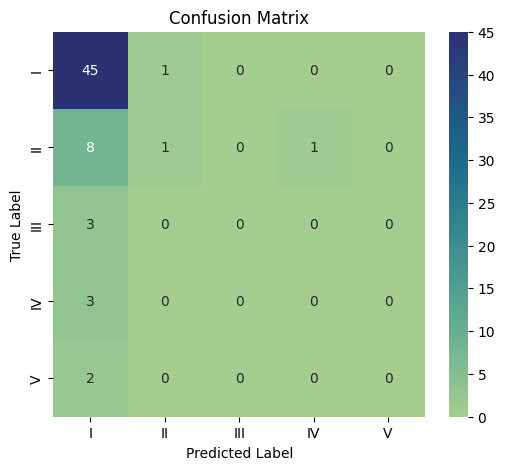

In [ ]:
# Creating a Heatmap using Confusion Matrix

conf_matrix = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="crest", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Defining my parameters grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],              # Minimum loss reduction
    'reg_lambda': [1, 10],               # L2 regularization
    'reg_alpha': [0, 0.1, 0.5],          # L1 regularization
}

In [ ]:
# Using the same XGBoost model as done previously, `xgb_clf`

# Use RandomizedSearchCV figuring out the best hyperparameters

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy', #Choosing 'accuracy' as my preferred metrics
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Fitting RandomSearchCV() on training data

random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [1, 10],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Printing the Best hyperparameters from RandomSearchCV()

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.2}


In [ ]:
# Training the final XGB model using best parameters from above

best_xgb = random_search.best_estimator_

In [ ]:
best_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Evaluating the above "Best Model" on validation data

y_val_pred = best_xgb.predict(x_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", round((accuracy_val * 100), 2), "%")

Validation Accuracy: 71.88 %


In [ ]:
# Evaluating on test data

y_test_pred = best_xgb.predict(x_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", round((accuracy_test * 100), 2), "%")

Test Accuracy: 72.94 %


In [ ]:
# Printing Classification Report

print("\nClassification Report (Test Data):\n", classification_report(y_test, y_test_pred))


Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        62
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         2

    accuracy                           0.73        85
   macro avg       0.15      0.20      0.17        85
weighted avg       0.53      0.73      0.62        85



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Observations on Model performance:
* Before Hyperparameter tuning:
  - Model had an accuracy of 72% on validation set
* After Hyperparameter tuning:
  - Model's accuracy has remained constant at 72% on validation set
  - On Test data, Model's accuracy was 73%, a small increase of 1 percentage points over that of validation set


---

# Part-2

## RNNs and Transformers



> The following data has been appended from a different notebook which tries to utilize RNN and Transformer Models to determine the "Accident Level" from "Accident Descriptions".

> Since the following is from a different notebook, a few steps like 'Importing Data', etc. are performed again.


<b>Importing necessary packages</b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

from sklearn.metrics import classification_report


from tqdm import tqdm
tqdm.pandas()

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

import torch
from sentence_transformers import SentenceTransformer

from huggingface_hub import hf_hub_download

<b>Data Preprocessing and Visualization</b>

In [ ]:
# Load the data

data = pd.read_excel('/kaggle/input/accident-descritpions/Data Set - Industrial Safety and Health Database with Accidents Description.xlsx')

In [ ]:
# Take copy of the datasets and use the copied dataset
df = data.copy()

<b>Data Overview</b>

In [ ]:
# Display the first five rows
df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


**Observations:**

As one of the column don't have any column name and its values don't affect the dataset, lets remove the column

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

Check if the unnamed column has been excluded

In [ ]:
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
# Check duplicate values
df.duplicated().sum()

7

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Reset index
df = df.reset_index()

*Check for missing values in the dataframe*

In [ ]:
# Check if there is any NAN values available in the dataset
pd.isna(df).sum()

index                       0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [ ]:
# Check for the empty values in the dataset
df.isin([' ']).sum()

index                       0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

**Observations:**

- There are no null values, no empty values or NAN values available in the dataframe

In [ ]:
# Update the datatype of data column to datetime
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
# Check if the datatype is updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     418 non-null    int64         
 1   Data                      418 non-null    datetime64[ns]
 2   Countries                 418 non-null    object        
 3   Local                     418 non-null    object        
 4   Industry Sector           418 non-null    object        
 5   Accident Level            418 non-null    object        
 6   Potential Accident Level  418 non-null    object        
 7   Genre                     418 non-null    object        
 8   Employee or Third Party   418 non-null    object        
 9   Critical Risk             418 non-null    object        
 10  Description               418 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 36.0+ KB


In [ ]:
# Rename the columns Data to Date and Genre to Gender
df = df.rename(columns={'Data': 'Date', 'Genre': 'Gender', 'Countries': 'Country', 'Employee or Third Party': 'Employment'})

In [ ]:
# Check if the column has been renamed
df.head()

,index,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
# Create three new columns Day, Month, Year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

**Convert below columns to categorical**
- Accident Level
- Potential Accident Level

In [ ]:
# convert Accident Level and Potential Accident Level columns to categorical
df["Accident Level"] = df["Accident Level"].astype("category")
df["Potential Accident Level"] = df["Potential Accident Level"].astype("category")

#### **Data PreProcessing using NLP**

- Lets update the data in the description column using nlp

In [ ]:
# Lowercase
df.Description = df.Description.str.lower()

In [ ]:
# Check if the code has any html tags
df[df.Description.str.contains('<') == True]

,index,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment,Critical Risk,Description,Year,Month,Day


In [ ]:
# Remove numbers and punctuations
import re
df.Description = df.Description.apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

In [ ]:
# Remove url's
df.Description = df.Description.apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
# Remove stopwords from dataset
df.Description = df.Description.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
# Define a function to use stemming
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [ ]:
df['Description Stem'] = df.Description.apply(lambda x: stem_words(x))

In [ ]:
df['Description Stem']

0      remov drill rod jumbo mainten supervisor proce...
1      activ sodium sulphid pump pipe uncoupl sulfid ...
2      sub station milpo locat level collabor excav w...
3      approxim nv cx ob personnel begin task unlock ...
4      approxim circumst mechan anthoni group leader ...
                             ...                        
413    approxim approxim lift kelli hq toward pulley ...
414    collabor move infrastructur offic julio toilet...
415    environment monitor activ area employe surpris...
416    employe perform activ strip cathod pull cathod...
417    assist clean floor modul e central camp slip b...
Name: Description Stem, Length: 418, dtype: object

#### _______________________________________________

In [ ]:
import nltk
import os

# Setting up a custom download directory

nltk_data_path = "/kaggle/working/nltk_data"
os.makedirs(nltk_data_path, exist_ok=True)

# Adding the NLTK data path

nltk.data.path.append(nltk_data_path)


# Downloading the required resources

nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('averaged_perceptron_tagger', download_dir=nltk_data_path)

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /kaggle/working/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import os

print(os.listdir("/kaggle/working/nltk_data/corpora"))


['omw-1.4.zip', 'wordnet', 'wordnet.zip']


In [ ]:
import zipfile

# Defining the corpus path
wordnet_zip_path = "/kaggle/working/nltk_data/corpora/wordnet.zip"
wordnet_extract_path = "/kaggle/working/nltk_data/corpora/"

# Extracting the ZIP file
with zipfile.ZipFile(wordnet_zip_path, 'r') as zip_ref:
    zip_ref.extractall(wordnet_extract_path)

# Verifying extraction
import os
print(os.listdir("/kaggle/working/nltk_data/corpora/"))


['omw-1.4.zip', 'wordnet', 'wordnet.zip']


In [ ]:
# 3. Lemmatization

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


lemmatizer = WordNetLemmatizer()

# Applying lemmatization to each word in every row

df['Description Lemma'] = df['Description'].apply(
    lambda text: ' '.join([
        lemmatizer.lemmatize(word.lower())
        for word in word_tokenize(str(text))
    ])
)

In [ ]:
df['Description Lemma'].head()

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    sub station milpo located level collaborator e...
3    approximately nv cx ob personnel begin task un...
4    approximately circumstance mechanic anthony gr...
Name: Description Lemma, dtype: object

In [ ]:
df['Description Original'] = df['Description']
df.head()

,index,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment,Critical Risk,Description,Year,Month,Day,Description Stem,Description Lemma,Description Original
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...,2016,1,1,remov drill rod jumbo mainten supervisor proce...,removing drill rod jumbo maintenance superviso...,removing drill rod jumbo maintenance superviso...
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,activation sodium sulphide pump piping uncoupl...,2016,1,2,activ sodium sulphid pump pipe uncoupl sulfid ...,activation sodium sulphide pump piping uncoupl...,activation sodium sulphide pump piping uncoupl...
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,sub station milpo located level collaborator e...,2016,1,6,sub station milpo locat level collabor excav w...,sub station milpo located level collaborator e...,sub station milpo located level collaborator e...
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,approximately nv cx ob personnel begins task u...,2016,1,8,approxim nv cx ob personnel begin task unlock ...,approximately nv cx ob personnel begin task un...,approximately nv cx ob personnel begins task u...
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,approximately circumstances mechanics anthony ...,2016,1,10,approxim circumst mechan anthoni group leader ...,approximately circumstance mechanic anthony gr...,approximately circumstances mechanics anthony ...


In [ ]:
# Print the maximum and minumum length of the text in description column
print('The maximum length of the text in description column -',df.Description.str.len().max())
print('The minimum length of the text in description column -',df.Description.str.len().min())

The maximum length of the text in description column - 663
The minimum length of the text in description column - 61


In [ ]:
print('The median length of the text in description column -',df.Description.str.len().median())

The median length of the text in description column - 213.5


In [ ]:
# Update the values to numeric

df['Accident Level'] = df['Accident Level'].map({'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5})
df['Potential Accident Level'] = df['Potential Accident Level'].map({'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V': 4, 'VI': 5})
df['Country'] = df['Country'].map({'Country_01':1,'Country_02':2,'Country_03':3})
df['Local'] = df['Local'].map({'Local_01':1,'Local_02':2,'Local_03':3,'Local_04':4,'Local_05':5,'Local_06':6,
                               'Local_07':7,'Local_08':8,'Local_09':9,'Local_10':10,'Local_11':11,'Local_12':12})
df['Industry Sector'] = df['Industry Sector'].map({'Mining':1,'Metals':2,'Others':3})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Employment'] = df['Employment'].map({'Employee': 0, 'Third Party': 1, 'Third Party (Remote)': 2})
df['Critical Risk'] = LabelEncoder().fit_transform(df['Critical Risk'])
df['Year'] = LabelEncoder().fit_transform(df['Year'])
df['Month'] = LabelEncoder().fit_transform(df['Month'])
df['Day'] = LabelEncoder().fit_transform(df['Day'])

In [ ]:
# Check data after encoding
df.head()

,index,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment,Critical Risk,Description,Year,Month,Day,Description Stem,Description Lemma,Description Original
0,0,2016-01-01,1,1,1,0,3,1,1,20,removing drill rod jumbo maintenance superviso...,0,0,0,remov drill rod jumbo mainten supervisor proce...,removing drill rod jumbo maintenance superviso...,removing drill rod jumbo maintenance superviso...
1,1,2016-01-02,2,2,1,0,3,1,0,21,activation sodium sulphide pump piping uncoupl...,0,0,1,activ sodium sulphid pump pipe uncoupl sulfid ...,activation sodium sulphide pump piping uncoupl...,activation sodium sulphide pump piping uncoupl...
2,2,2016-01-06,1,3,1,0,2,1,2,15,sub station milpo located level collaborator e...,0,0,5,sub station milpo locat level collabor excav w...,sub station milpo located level collaborator e...,sub station milpo located level collaborator e...
3,3,2016-01-08,1,4,1,0,0,1,1,16,approximately nv cx ob personnel begins task u...,0,0,7,approxim nv cx ob personnel begin task unlock ...,approximately nv cx ob personnel begin task un...,approximately nv cx ob personnel begins task u...
4,4,2016-01-10,1,4,1,3,3,1,1,16,approximately circumstances mechanics anthony ...,0,0,9,approxim circumst mechan anthoni group leader ...,approximately circumstance mechanic anthony gr...,approximately circumstances mechanics anthony ...


In [ ]:
# Drop the date column
df = df.drop(columns=['Date'], axis=1)

In [ ]:
# Take a copy of the cleaned data
df1 = df.copy()

In [ ]:
# Keep the cleaned description column and remove the other two description columns
df = df.drop(columns=['Description Stem', 'Description Lemma', 'Description Original'], axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer to convert text data to numbers
vectorizer = TfidfVectorizer(max_features=10)
df_id = vectorizer.fit_transform(df['Description'])
df_id = df_id.toarray()

# Creating dataframe of description_ifidf
df_id = pd.DataFrame(df_id, columns=["TFIDF_" + n for n in vectorizer.get_feature_names_out()])
df_id.head(5)

,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
1,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
2,0.0,0.553939,0.383344,0.0,0.412550,0.461166,0.404137,0.0,0.00000,0.0
3,0.0,0.000000,0.349399,0.0,0.752037,0.420330,0.368351,0.0,0.00000,0.0
4,0.0,0.000000,0.529535,0.0,0.000000,0.637035,0.000000,0.0,0.56016,0.0


In [ ]:
# Drop the description column in the df dataset
df = df.drop(columns=['Description'], axis=1)

In [ ]:
# Merge the Tfid dataset
df = pd.concat([df, df_id], axis=1)

In [ ]:
# Displat the first five rows of merged data
df.head()

,index,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employment,Critical Risk,Year,...,TFIDF_activity,TFIDF_area,TFIDF_causing,TFIDF_employee,TFIDF_hand,TFIDF_injury,TFIDF_left,TFIDF_operator,TFIDF_right,TFIDF_time
0,0,1,1,1,0,3,1,1,20,0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
1,1,2,2,1,0,3,1,0,21,0,...,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
2,2,1,3,1,0,2,1,2,15,0,...,0.0,0.553939,0.383344,0.0,0.412550,0.461166,0.404137,0.0,0.00000,0.0
3,3,1,4,1,0,0,1,1,16,0,...,0.0,0.000000,0.349399,0.0,0.752037,0.420330,0.368351,0.0,0.00000,0.0
4,4,1,4,1,3,3,1,1,16,0,...,0.0,0.000000,0.529535,0.0,0.000000,0.637035,0.000000,0.0,0.56016,0.0


### _______________________________________________________________________________________________________________________

# Deep Learning - RNN

#### **Train Test Split**

In [ ]:
# Split the columns into X and Y variables for model training and building
X = df.drop(columns = ['Accident Level'], axis=1)
y = df['Accident Level']

In [ ]:
# split data into train and test
x_split, x_test, y_split, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_split, y_split, test_size=0.15, stratify=y_split, random_state=42)

# standardize the dataset using StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.fit_transform(x_val)
x_test = scaler.transform(x_test)

In [ ]:
# Printing shapes of the variables again:

print("x_split shape:", x_split.shape)
print("x_test shape:", x_test.shape)
print("y_split shape:", y_split.shape)
print("y_test shape:", y_test.shape)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

x_split shape: (334, 21)
x_test shape: (84, 21)
y_split shape: (334,)
y_test shape: (84,)
x_train shape: (283, 21)
x_val shape: (51, 21)
y_train shape: (283,)
y_val shape: (51,)


In [ ]:
# Re-shaping my input dataframes, since RNN's expect a 3-D input structure -> (batch_size, timesteps, features)

x_train_reshaped = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_val_reshaped = np.reshape(x_val, (x_val.shape[0], 1, x_val.shape[1]))
x_test_reshaped = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
'''
Performing a One Hot Encoding(OHE) since, the loss calculating function, "categorical_crossentropy"
used in my RNN to calculate the loss function expects the target variable (y) to be OHE
'''
y_train_encoded = pd.get_dummies(pd.Categorical(y_train, categories=range(5))).to_numpy().astype(int)
y_val_encoded = pd.get_dummies(pd.Categorical(y_val, categories=range(5))).to_numpy().astype(int)
y_test_encoded = pd.get_dummies(pd.Categorical(y_test, categories=range(5))).to_numpy().astype(int)

print("y_train_encoded shape:", y_train_encoded.shape)
print("y_val_encoded shape:", y_val_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

y_train_encoded shape: (283, 5)
y_val_encoded shape: (51, 5)
y_test_encoded shape: (84, 5)


In [ ]:
print("\n", y_train.value_counts(),
      "\n", y_test.value_counts(),
      "\n", y_val.value_counts()
     )


 Accident Level
0    209
1     27
2     21
3     21
4      5
Name: count, dtype: int64 
 Accident Level
0    62
1     8
2     6
3     6
4     2
Name: count, dtype: int64 
 Accident Level
0    38
1     5
2     4
3     3
4     1
Name: count, dtype: int64


In [ ]:
# Printing shapes of the x-dataframes:

print("x_test_reshaped shape:", x_test_reshaped.shape)
print("x_train_reshaped shape:", x_train_reshaped.shape)
print("x_val_reshaped shape:", x_val_reshaped.shape)


x_test_reshaped shape: (84, 1, 21)
x_train_reshaped shape: (283, 1, 21)
x_val_reshaped shape: (51, 1, 21)


In [ ]:
# RNN Model Creation

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

RNN = Sequential([
            SimpleRNN(128, activation="tanh", return_sequences=True, input_shape=(1, x_train.shape[1])),  # Layer 1
            SimpleRNN(64, activation="tanh", return_sequences=True),  # Layer 2
            SimpleRNN(32, activation="tanh"),  # Layer 3
            Dense(5, activation="softmax")  # Using Softmax for multi-class classification
])

In [ ]:
# Compiling the model. Metric Chosen -> "Accuracy"

RNN.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Model Training

history = RNN.fit(
    x_train_reshaped, y_train_encoded,
    epochs=20, batch_size=64,
    validation_data=(x_val_reshaped, y_val_encoded),
    verbose=1
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.1103 - loss: 1.6970 - val_accuracy: 0.2353 - val_loss: 1.6031
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3226 - loss: 1.5003 - val_accuracy: 0.3725 - val_loss: 1.5175
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5489 - loss: 1.3805 - val_accuracy: 0.4118 - val_loss: 1.4494
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6087 - loss: 1.2849 - val_accuracy: 0.5098 - val_loss: 1.3722
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6541 - loss: 1.1923 - val_accuracy: 0.5294 - val_loss: 1.3031
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6900 - loss: 1.0701 - val_accuracy: 0.6078 - val_loss: 1.2257
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7004 - loss: 0.9703 - val_accuracy: 0.5882 - val_loss: 1.1456
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7453 - loss: 0.8698 - val_accuracy: 0.5882 - val_loss: 1.0769
Epoch 9/

In [ ]:
# Model Evaluation

test_loss, test_acc = RNN.evaluate(x_test_reshaped, y_test_encoded)
print(f"Test Accuracy: {test_acc*100: .2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.7675 - loss: 0.7786
Test Accuracy:  73.81%


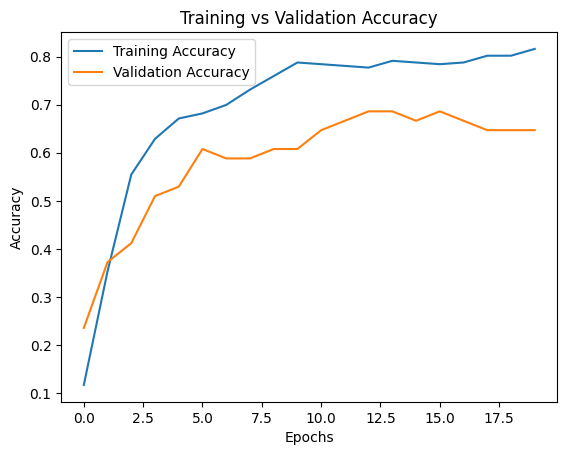

In [ ]:
#  Plotting training vs. validation accracy over the RNN model's epochs:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


#### Observation:

* The accuracy vs. epoch graph clearly shows that the current model is overfitting since Training Set's accuracy is ~80% while the validation set's accuracy is ~60%

## RNN-2
##### - Modifying the previous model to use "RMSProp" as my optimizing algorithm and "LayerNormalization()" for better model stability. Also, using "Bi-Directional" RNN, "class-weights" for better Accuracy

#### Note:
* "RMSProp" and "LayerNormalization" are highly recommended for RNNs. Reason:
  - "RMSProp": Using it will help us reduce noise further in a RNN (highly sensitive to noise)
  - "LayerNormalization": Independent of Batch size and works well with RNNs
#####
* "Bi-directional" RNNs, aka BiRNNs, are used for better contextual processing of data.
  - These are built by combining two RNN models; one-> processing data from the begining to end; other -> in reverse direction. Final output of BiRNN is created by using the above two RNNs
  - This allows the BiRNN model to have information of both previous and succeeding words for a given target word thereby providing a better contextual understanding


In [ ]:
# Training a second RNN model

from tensorflow.keras.layers import LayerNormalization, Bidirectional


RNN_2 = Sequential([
    Bidirectional(SimpleRNN(128, activation="tanh", return_sequences=True), input_shape=(1, x_train.shape[1])),
    LayerNormalization(),
    SimpleRNN(64, activation="tanh", return_sequences=True),
    LayerNormalization(),
    SimpleRNN(32, activation="tanh"),
    Dense(5, activation="softmax")
])

In [ ]:
# Compiling using 'RMSprop'

RNN_2.compile(optimizer="RMSprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Training

history_2 = RNN_2.fit(
    x_train_reshaped, y_train_encoded,
    epochs=20, batch_size=64,
    validation_data=(x_val_reshaped, y_val_encoded),
    verbose=1
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 721ms/step - accuracy: 0.2676 - loss: 1.6690 - val_accuracy: 0.4902 - val_loss: 1.2493
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7357 - loss: 1.0377 - val_accuracy: 0.6471 - val_loss: 1.0622
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7735 - loss: 0.8189 - val_accuracy: 0.6667 - val_loss: 0.9933
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8220 - loss: 0.7094 - val_accuracy: 0.7059 - val_loss: 0.9175
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8209 - loss: 0.6338 - val_accuracy: 0.6667 - val_loss: 0.9423
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8373 - loss: 0.5487 - val_accuracy: 0.7451 - val_loss: 0.8833
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8590 - loss: 0.4841 - val_accuracy: 0.7059 - val_loss: 0.8990
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8821 - loss: 0.4249 - val_accuracy: 0.6863 - val_loss: 0.8627
Epoch 

In [ ]:
# Evaluate
test_loss_best, test_acc_best = RNN_2.evaluate(x_test_reshaped, y_test_encoded)
print(f"Test Accuracy after Bi-Directional RNN: {test_acc_best*100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.7223 - loss: 0.8683
Test Accuracy after Bi-Directional RNN: 70.24%


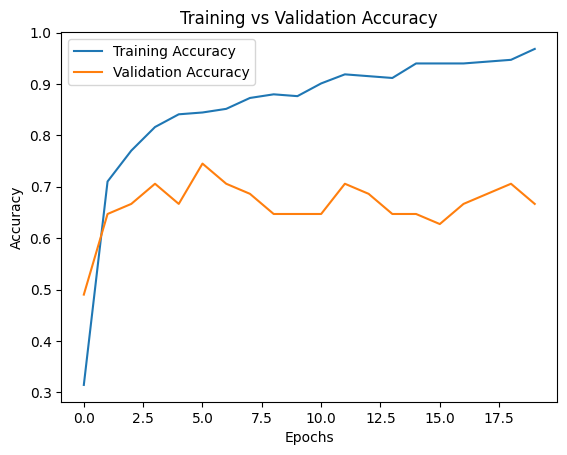

In [ ]:
#  Plotting training vs. validation accracy over the RNN model's epochs:

plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


### Observations:
* The RNN_2 model's accuracy decreased to 70% (a 3.8 percentage point drop) as compared to the base RNN model
* Notable, not just the RNN_2 model's accuracy decreased, it is more prone to overfitting

### ______________________________________________________________________________________________

## Step-2: Transformers - MiniLM

-- Using `MiniLM` on the data

In [ ]:
#  Using initially copied DF, `df1` to access the non-embedded and non-OHE variables, 'X' and 'y'

X = df1['Description'] #-- 'Description' is already cleaned
y = df1['Accident Level'] #Target

In [ ]:
X[0]

'removing drill rod jumbo maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo'

In [ ]:
# Importing necessary libraries

from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# Loading MiniLM tokenizer and model
model_name = "microsoft/MiniLM-L12-H384-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/133M [00:00<?, ?B/s]

In [ ]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Converting "X_train" & "X_test" into MiniLM Embeddings

# Using a UDF for conversion

def get_embeddings(text_list):
    # First, Tokenizing the input text
    encodings = tokenizer(text_list, padding=True, truncation=True, return_tensors="pt")

    # Noe, extracting the embeddings from MiniLM model
    with torch.no_grad():
        outputs = model(**encodings)

    # Lastly, extracting [CLS] token representation (used for sentence embedding)

    embeddings = outputs.last_hidden_state[:, 0, :].numpy()

    return embeddings

In [ ]:
# Conversion to embeddings

X_train_embeddings = get_embeddings(X_train.tolist())

X_test_embeddings = get_embeddings(X_test.tolist())


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
# Training a RandomForest Classifier on the MiniLM Embeddings:


clf = RandomForestClassifier(n_estimators=100, random_state=79)

clf.fit(X_train_embeddings, y_train)

RandomForestClassifier(random_state=79)

In [ ]:
# Evaluation

accuracy = clf.score(X_test_embeddings, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 73.81%


In [ ]:
# Predictions for RF basis MiniLM data

y_pred = clf.predict(X_test_embeddings)

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        62
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.74        84
   macro avg       0.15      0.20      0.17        84
weighted avg       0.55      0.74      0.63        84



In [ ]:
# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[62  0  0  0  0]
 [ 8  0  0  0  0]
 [ 6  0  0  0  0]
 [ 5  1  0  0  0]
 [ 2  0  0  0  0]]


In [ ]:
'''
Hyperparameter Tuning of Random Forest Classifier
- using GridSearchCV() for best results
'''

from sklearn.model_selection import GridSearchCV

# Hyperparameter grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train_embeddings, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=79), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
# Using the best model for predictions

best_clf = grid_search.best_estimator_

In [ ]:
best_clf.fit(X_train_embeddings, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=79)

In [ ]:
# Evaluation

accuracy = best_clf.score(X_test_embeddings, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 73.81%


### Notes:

#### Context:  
1. Used MiniLm to create word embeddings for X and then using RandomForest, tried to predict y.

#### Observations from MiniLM
1. The acccuracy of the RF model using MiniLM embeddings is equivalent to an RNN Model trained using TF-IDs.
2. Multiple models have been tested with different embeddings, and hyper-tuning methods but it is observed that `73.81%` is the highest accuracy we can achieve using the provided data.